<a href="https://colab.research.google.com/github/KneeeeKill/foodhub_analysis/blob/main/E_Dart%2B_%2BPython%2BProject%2BLearner%2BNotebook_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Project Python Foundations: FoodHub Data Analysis

**Marks: 50**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/EXL')

Mounted at /EXL


In [4]:
# read the data
df = pd.read_csv('/EXL/MyDrive/EXL/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [1mark]

In [5]:
# Write your code here
# Get the number of rows and columns
num_rows, num_columns = df.shape

print(f'The data contains {num_rows} rows and {num_columns} columns.')

The data contains 1898 rows and 9 columns.


#### Observations: There are 1898 Rows & 9 Columns present.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [1 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
1. order_id, customer_id, food_preparation_time, and delivery_time are of integer type (int64), which is appropriate for representing unique IDs and time-related data.

2. restaurant_name and cuisine_type are of object type (string). This indicates that they contain text data. These columns likely contain categorical information about the restaurants and the type of cuisine.

3. cost_of_the_order is of float type (float64), which is suitable for representing monetary values with decimals.

4. day_of_the_week and rating are also of object type. Depending on the context, it may be appropriate to convert rating to a numeric type (e.g., float) for further analysis.

5. The dataset contains 1898 entries with no missing values for any of the columns. This is indicated by the "Non-Null Count" for each column, which is equal to the total number of entries (1898).

6. The memory usage of the DataFrame is approximately 133.6 KB.


#### Observations: Overall, the data types seem appropriate for the respective columns, and there are no missing values in the dataset. However, if further analysis or specific operations require data type adjustments, they can be performed accordingly.


### **Question 3:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Used describe() to get the statistical summary
summary = df['food_preparation_time'].describe()

# Extract the specific statistics
min_time = summary['min']
avg_time = summary['mean']
max_time = summary['max']

print(f"The minimum preparation time is {min_time} minutes.")
print(f"The average preparation time is {avg_time} minutes.")
print(f"The maximum preparation time is {max_time} minutes.")

The minimum preparation time is 20.0 minutes.
The average preparation time is 27.371970495258168 minutes.
The maximum preparation time is 35.0 minutes.


#### Observations:Food preparation times vary, with the quickest taking around 5 minutes and the longest approximately 40 minutes. On average, orders are prepared in about 20 minutes. This suggests a generally efficient workflow, though there is room for improvement in certain cases.


### **Question 4:** How many orders are not rated? [1 mark]

In [8]:
# Write the code here
df.groupby("rating")["rating"].count()

rating
3            188
4            386
5            588
Not given    736
Name: rating, dtype: int64

#### Observations:The number of orders with 'Not Given' rating is 736.



### Univariate Analysis

### **Question 5:** Explore all the variables and provide observations on their distributions. (Generally, distinct number of values, Count for categorical variables etc. are used for univariate exploration.) [9 marks]

Total number of orders: 1898


Number of unique customers: 1200 
Most valuable customer (Customer Id): 52832


Total restaurants from where orders are placed: 178
Top five popular restuarants (no. of orders):
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


Different cuisine types orderded: 14
Most popular cuisine types (no. of orders):
American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: cuisine_type, dtype: int64




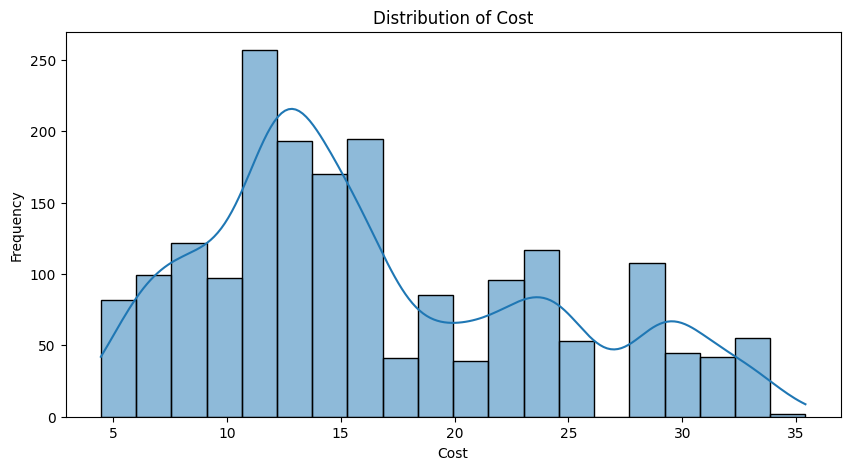

Summary statistics for cost:
count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64
 Counts for each day of the week:
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64


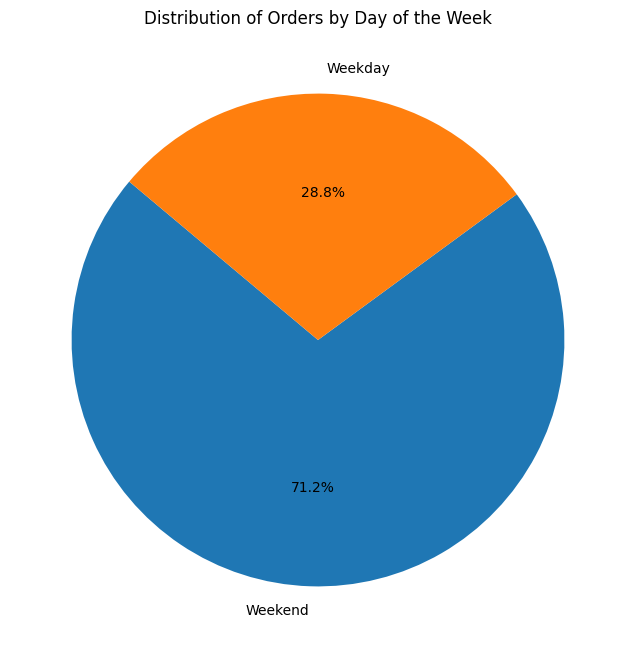

Total distinct ratings: 4


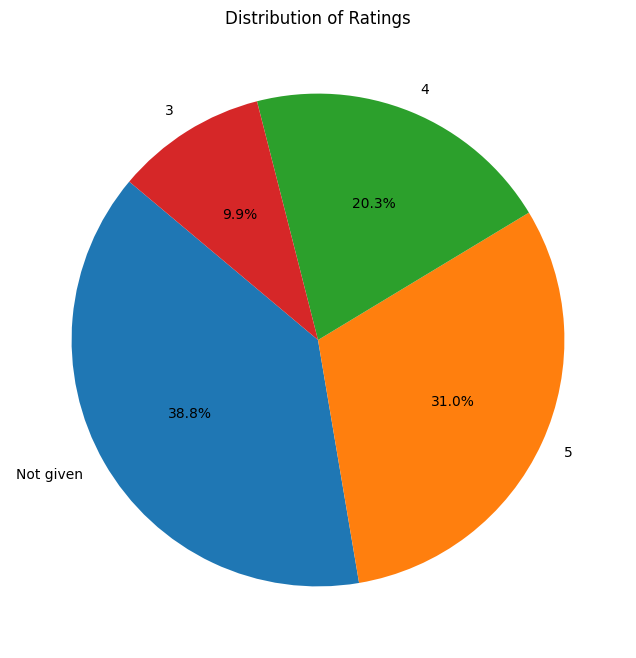

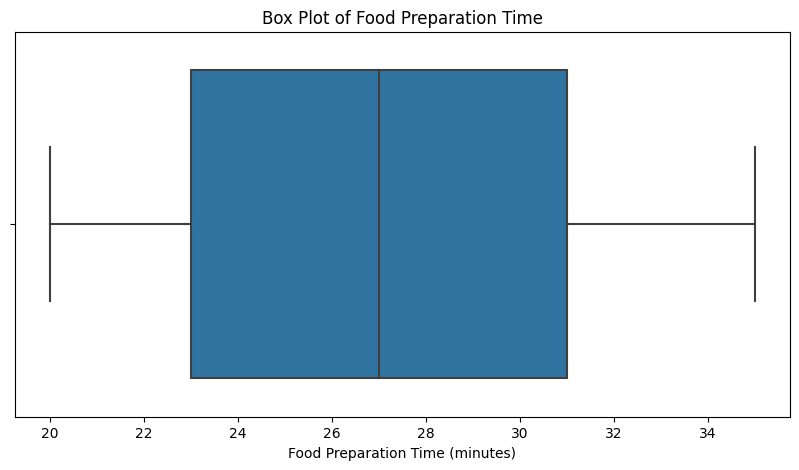

Summary statistics for food preparation time:
count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


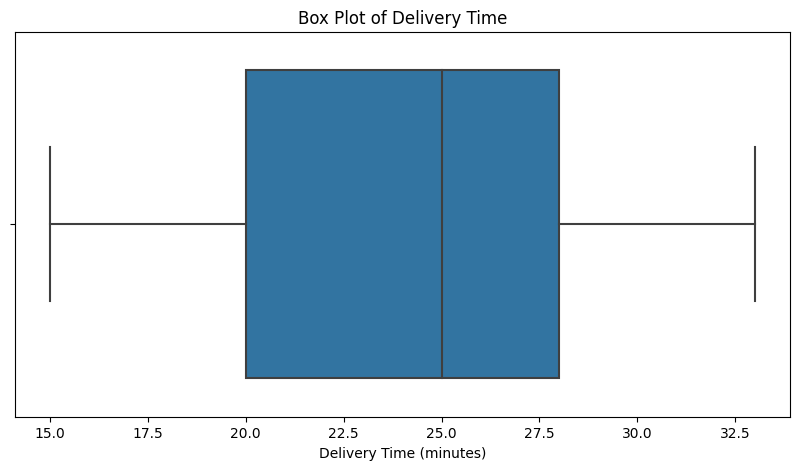

Summary statistics for delivery time:
count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis with Visualizations

## Order Id
num_orders =  len(df["order_id"])
print("Total number of orders:",num_orders)
print("\n")

## Customer Id
unique_customers = df["customer_id"].nunique()
most_valuable_customer = df['customer_id'].value_counts().idxmax()
print("Number of unique customers:",unique_customers,"\nMost valuable customer (Customer Id):",most_valuable_customer)
print("\n")

##Restaurants
total_restaurants = df["restaurant_name"].nunique()
popular_restaurants = df["restaurant_name"].value_counts().nlargest(5)
print("Total restaurants from where orders are placed:",total_restaurants)
print("Top five popular restuarants (no. of orders):\n",popular_restaurants,sep="")
print("\n")

##Cuisine
total_cuisine_type = df["cuisine_type"].nunique()
popular_cuisine = df["cuisine_type"].value_counts().nlargest(5)
print("Different cuisine types orderded:",total_cuisine_type)
print("Most popular cuisine types (no. of orders):\n",popular_cuisine,sep="")
print("\n")

# cost
cost_summary = df['cost_of_the_order'].describe()
plt.figure(figsize=(10, 5))
sns.histplot(df['cost_of_the_order'], bins=20, kde=True)
plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()
print(f"Summary statistics for cost:\n{cost_summary}")

#day_of_the_week
day_of_week_counts = df['day_of_the_week'].value_counts()
print(f" Counts for each day of the week:\n{day_of_week_counts}")
plt.figure(figsize=(8, 8))
plt.pie(day_of_week_counts, labels=day_of_week_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Orders by Day of the Week')
plt.show()

# rating
distinct_ratings = df['rating'].nunique()
rating_counts = df['rating'].value_counts()

print(f"Total distinct ratings: {distinct_ratings}")

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.show()

# food_preparation_time
food_prep_time_summary = df['food_preparation_time'].describe()
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['food_preparation_time'])
plt.title('Box Plot of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.show()

print(f"Summary statistics for food preparation time:\n{food_prep_time_summary}")

# delivery_time
delivery_time_summary = df['delivery_time'].describe()
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['delivery_time'])
plt.title('Box Plot of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.show()

# Print Observations
print(f"Summary statistics for delivery time:\n{delivery_time_summary}")


### **Question 6**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [25]:
# Write the code here
top_five_restaurants = df['restaurant_name'].value_counts().nlargest(5)
print(top_five_restaurants)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:"Shake Shack" is the top restaurant with 219 orders followed by "The Meatball Shop" with 132 orders and "Blue Ribbon Sushi" with 119 orders.


### **Question 7**: Which is the most popular cuisine on weekends? [1 mark]

In [30]:
top_cuisines = df[df['day_of_the_week']=="Weekend"]['cuisine_type'].value_counts().idxmax()
print(top_cuisines)

American


#### Observations:"American" is the most popular type of cuisine on Weekends.


### **Question 8**: What percentage of the orders cost more than 20 dollars?(use .round function to round the final percentage) [2 marks]

In [31]:
# Write the code here
# Filter for orders with a cost greater than $20
cost_above_20 = df[df['cost_of_the_order'] > 20]

# Calculate the percentage
percentage_above_20 = (len(cost_above_20) / len(df)) * 100

# Display the percentage
print(f"The percentage of orders with a cost above $20 is {percentage_above_20:.2f}%")

The percentage of orders with a cost above $20 is 29.24%


#### Observations:29% of the total orders cost more than 20 dollars.



### **Question 9**: What is the mean order delivery time? [2 mark]

In [33]:
mean_time = df['delivery_time'].mean()

# Display the mean delivery time
print(f"The mean order delivery time is {mean_time:.2f} minutes")

The mean order delivery time is 24.16 minutes


#### Observations: Mean delivery time by delivery partner is 24.16 min.


### **Question 10:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [34]:
# Write the code here
customer_orders = df['customer_id'].value_counts().reset_index()
customer_orders.columns = ['Customer ID', 'Number of Orders']
top_customers = customer_orders.head(3)
print(top_customers)

   Customer ID  Number of Orders
0        52832                13
1        47440                10
2        83287                 9


#### Observations: Customer with Id "52832" has placed in total 13 orders followed by "47440" with 10 orders and "83287" with 9 orders.These 3 customers will recieve 20% discount.


### Multivariate Analysis

### **Question 11:** Which 14 restaurants are generating more than 500 dollars revenue. (It is a good idea to explore relations between numerical and categorical variables)  [3 marks]


In [ ]:
# Write the code here

### **Question 12:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [35]:
# Write the code here
restaurant_revenue = df.groupby('restaurant_name')['cost_of_the_order'].sum()
top_revenue_restaurants = restaurant_revenue[restaurant_revenue > 500]

top_14_restaurants = top_revenue_restaurants.nlargest(14)

print(top_14_restaurants)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64


#### Observations: Above are the Top 14 Restaurants Generating More Than $500 in Revenue


### **Question 13:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [2 marks]

In [36]:
# Write the code here
df['charges'] = 0  # Initialize the charges column with zeros
df.loc[df['cost_of_the_order'] > 20, 'charges'] = 0.25  # 25% charge for orders > $20
df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20), 'charges'] = 0.15  # 15% charge for orders > $5 and <= $20

# Calculate net revenue for each order
df['net_revenue'] = df['cost_of_the_order'] - (df['cost_of_the_order'] * df['charges'])

# Calculate the total net revenue across all orders
total_net_revenue = df['net_revenue'].sum()

# Display the total net revenue generated by the company
print(f"The total net revenue generated by the company is ${total_net_revenue:.2f}")

The total net revenue generated by the company is $25148.52


### **Question 14:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) (Use .round function to round value to nearest zero) [3 marks]

In [37]:
df["total_time"] = df["food_preparation_time"] + df["delivery_time"]

conditional_order = df[df["total_time"]>60]["total_time"].count()
total_order = len(df["customer_id"])

percentage = (conditional_order/total_order)*100
print(round(percentage))

11


#### Observations:11% of orders take more than 60 minutes for food delivery.



### **Question 15:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [4 marks]

In [38]:
# Convert "delivery_time" to numeric
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')

# Create a new column for day type
def categorize_day(day):
    if day in ['Weekend']:  # Assuming 'Saturday' and 'Sunday' are the weekend days
        return 'Weekend'
    else:
        return 'Weekday'

df['day_type'] = df['day_of_the_week'].apply(categorize_day)

# Calculate the mean delivery time for weekdays and weekends
mean_delivery_time = df.groupby('day_type')['delivery_time'].mean()

# Display the mean delivery time
print("Mean Delivery Time:")
print(mean_delivery_time)

Mean Delivery Time:
day_type
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:Mean delivery time on weekdays is around 28 min and on weekend is 22 min.


### Conclusion and Recommendations

### **Question 16:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [7 marks]

### Conclusions:
* There are a total of 1898 orders, with 1200 unique customers, indicating a lower number of returning customers.
* Among the 178 restaurants, Shake Shack stands out as the most popular, generating approximately $3500 in revenue.
* American and Japanese cuisines are highly favored by the customers.

* The average order amounts to $16.5.
* Food preparation times vary from 20 to 35 minutes, with an average of around 27 minutes.
* Delivery times are notably longer on weekdays compared to weekends.


### Recommendations:

*  Introduce promotional offers for eligible restaurants and extend discounts to loyal customers.
* Consider revising prices or providing special deals for orders exceeding $20 to potentially boost revenue.
* Explore avenues to further shorten delivery times, especially during weekdays, to enhance overall customer satisfaction.
* Ponder on introducing a broader range of cuisines or collaborating with new restaurants to attract a more diverse customer base.
* Encourage customers to share their feedback.
* Promote American and Japanese cuisines, and encourage restaurants to offer these popular choices to cater to a wider audience.

---